<a href="https://colab.research.google.com/github/alex-fedorenk0/ml-zoomcamp/blob/main/week8/ml_zoomcamp_chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading and imports

In [7]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 45.67 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

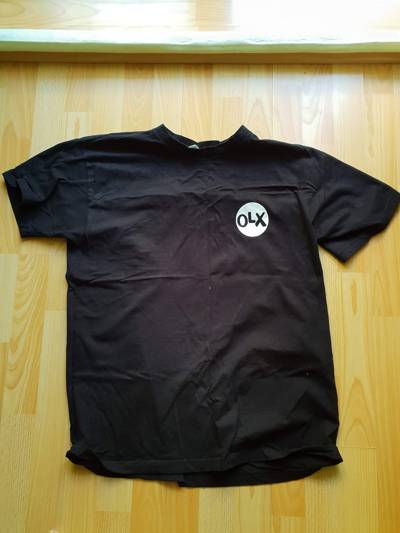

In [ ]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

In [ ]:
img = load_img(fullname, target_size=(299, 299))

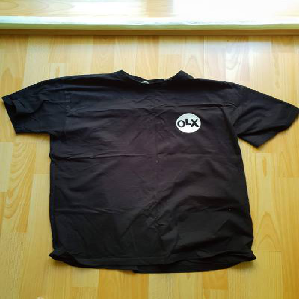

In [ ]:
img

In [ ]:
x = np.array(img)

## Pre-trained networks

In [3]:
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 5s 0us/step


In [ ]:
X = preprocess_input(np.array([x]))

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 7s 7s/step


In [ ]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.035299573),
  ('n03710637', 'maillot', 0.01088412),
  ('n04525038', 'velvet', 0.0018057581)]]

## Transfer learning

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
     target_size=(150, 150),
     batch_size=32,
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
X, y = next(train_ds)

In [ ]:
X.shape

(32, 150, 150, 3)

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y.shape

(32, 10)

In [8]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
base_model.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 17s 147ms/step - loss: 20.3242 - accuracy: 0.4332 - val_loss: 1.5053 - val_accuracy: 0.7126
Epoch 2/10
96/96 [==============================] - 14s 141ms/step - loss: 1.0678 - accuracy: 0.7585 - val_loss: 1.1715 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 13s 139ms/step - loss: 0.5748 - accuracy: 0.8341 - val_loss: 0.9659 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 13s 138ms/step - loss: 0.3503 - accuracy: 0.8882 - val_loss: 0.9057 - val_accuracy: 0.7889
Epoch 5/10
96/96 [==============================] - 13s 138ms/step - loss: 0.2534 - accuracy: 0.9133 - val_loss: 0.8039 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 14s 146ms/step - loss: 0.1472 - accuracy: 0.9534 - val_loss: 0.8003 - val_accuracy: 0.7977
Epoch 7/10
96/96 [==============================] - 13s 139ms/step - loss: 0.0851 - accuracy: 0.9765 - val_loss: 0.8523 - val_accuracy: 0.815

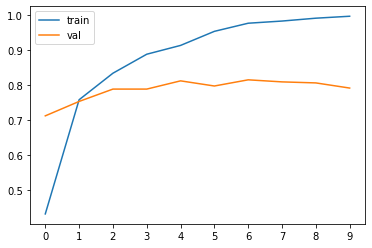

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend();

## Adjusting the learning rate

In [ ]:
def make_model(learning_rate=0.01):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ###################################################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  pooling = keras.layers.GlobalAveragePooling2D()
  vectors = pooling(base)
  outputs = keras.layers.Dense(10)(vectors)
  model = keras.Model(inputs, outputs)

  ###################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)

  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[lr] = history.history

  print()
  print()

0.0001
Epoch 1/10
96/96 [==============================] - 17s 149ms/step - loss: 1.9812 - accuracy: 0.3207 - val_loss: 1.6280 - val_accuracy: 0.4721
Epoch 2/10
96/96 [==============================] - 14s 146ms/step - loss: 1.4339 - accuracy: 0.5355 - val_loss: 1.2768 - val_accuracy: 0.5953
Epoch 3/10
96/96 [==============================] - 13s 138ms/step - loss: 1.1776 - accuracy: 0.6317 - val_loss: 1.0875 - val_accuracy: 0.6598
Epoch 4/10
96/96 [==============================] - 13s 138ms/step - loss: 1.0303 - accuracy: 0.6731 - val_loss: 0.9713 - val_accuracy: 0.7097
Epoch 5/10
96/96 [==============================] - 13s 139ms/step - loss: 0.9326 - accuracy: 0.7089 - val_loss: 0.8937 - val_accuracy: 0.7331
Epoch 6/10
96/96 [==============================] - 14s 145ms/step - loss: 0.8615 - accuracy: 0.7239 - val_loss: 0.8407 - val_accuracy: 0.7419
Epoch 7/10
96/96 [==============================] - 13s 137ms/step - loss: 0.8064 - accuracy: 0.7422 - val_loss: 0.8014 - val_accuracy:

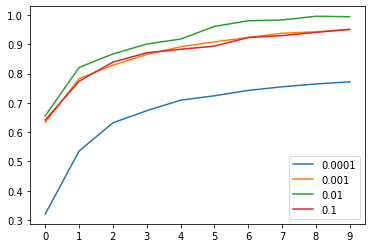

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist['accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

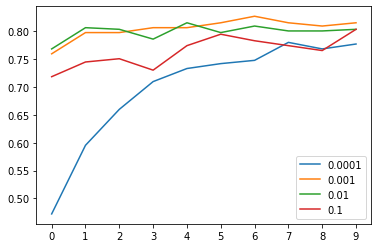

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

## Checkpointing

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    )

In [ ]:
model = make_model(learning_rate=0.001)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - 18s 156ms/step - loss: 1.1119 - accuracy: 0.6284 - val_loss: 0.7303 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 14s 144ms/step - loss: 0.6277 - accuracy: 0.7904 - val_loss: 0.6557 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 15s 152ms/step - loss: 0.5068 - accuracy: 0.8318 - val_loss: 0.5893 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 14s 142ms/step - loss: 0.4290 - accuracy: 0.8647 - val_loss: 0.5597 - val_accuracy: 0.8240
Epoch 5/10
96/96 [==============================] - 13s 139ms/step - loss: 0.3712 - accuracy: 0.8856 - val_loss: 0.5435 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 13s 139ms/step - loss: 0.3311 - accuracy: 0.9051 - val_loss: 0.5418 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 14s 150ms/step - loss: 0.2921 - accuracy: 0.9179 - val_loss: 0.5127 - val_accuracy: 0.8328

## Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ###################################################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  pooling = keras.layers.GlobalAveragePooling2D()
  vectors = pooling(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
  outputs = keras.layers.Dense(10)(inner)

  model = keras.Model(inputs, outputs)

  ###################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [ ]:
scores = {}

for size in [10, 100, 1000]:
  print(size)

  model = make_model(learning_rate=0.001, size_inner=size)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] = history.history

  print()
  print()

10
Epoch 1/10
96/96 [==============================] - 17s 149ms/step - loss: 1.4040 - accuracy: 0.5326 - val_loss: 0.9414 - val_accuracy: 0.7067
Epoch 2/10
96/96 [==============================] - 13s 140ms/step - loss: 0.8041 - accuracy: 0.7252 - val_loss: 0.7507 - val_accuracy: 0.7683
Epoch 3/10
96/96 [==============================] - 13s 139ms/step - loss: 0.6296 - accuracy: 0.7875 - val_loss: 0.6652 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 14s 140ms/step - loss: 0.5155 - accuracy: 0.8308 - val_loss: 0.6341 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 14s 148ms/step - loss: 0.4435 - accuracy: 0.8550 - val_loss: 0.6215 - val_accuracy: 0.7859
Epoch 6/10
96/96 [==============================] - 13s 139ms/step - loss: 0.3887 - accuracy: 0.8787 - val_loss: 0.5968 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 13s 139ms/step - loss: 0.3359 - accuracy: 0.8957 - val_loss: 0.5839 - val_accuracy: 0.8

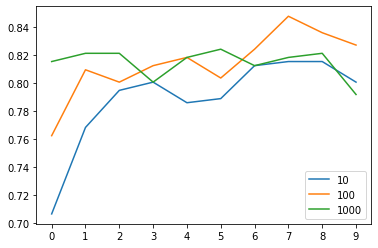

In [ ]:
for size, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=size)
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
inner_size = 100

## Regularization and dropout

In [37]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.5):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ###################################################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  pooling = keras.layers.GlobalAveragePooling2D()
  vectors = pooling(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(drop_rate)(inner)
  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  ###################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [39]:
scores = {}

for drop_rate in [0.0, 0.2, 0.5, 0.8]:
  print(f'Drop rate: {drop_rate}')

  model = make_model(
      learning_rate=0.001,
      size_inner=100,
      drop_rate=drop_rate
      )
  
  history = model.fit(train_ds, epochs=30, validation_data=val_ds)
  scores[drop_rate] = history.history

  print()
  print()

Drop rate: 0.0
Epoch 1/30
96/96 [==============================] - 18s 160ms/step - loss: 0.9605 - accuracy: 0.6711 - val_loss: 0.6626 - val_accuracy: 0.7683
Epoch 2/30
96/96 [==============================] - 14s 147ms/step - loss: 0.5111 - accuracy: 0.8171 - val_loss: 0.6435 - val_accuracy: 0.7683
Epoch 3/30
96/96 [==============================] - 13s 136ms/step - loss: 0.3528 - accuracy: 0.8716 - val_loss: 0.4977 - val_accuracy: 0.8446
Epoch 4/30
96/96 [==============================] - 14s 147ms/step - loss: 0.2458 - accuracy: 0.9221 - val_loss: 0.5721 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 15s 154ms/step - loss: 0.1726 - accuracy: 0.9544 - val_loss: 0.5621 - val_accuracy: 0.8152
Epoch 6/30
96/96 [==============================] - 16s 170ms/step - loss: 0.1201 - accuracy: 0.9733 - val_loss: 0.5141 - val_accuracy: 0.8416
Epoch 7/30
96/96 [==============================] - 14s 145ms/step - loss: 0.0870 - accuracy: 0.9831 - val_loss: 0.5405 - val_a

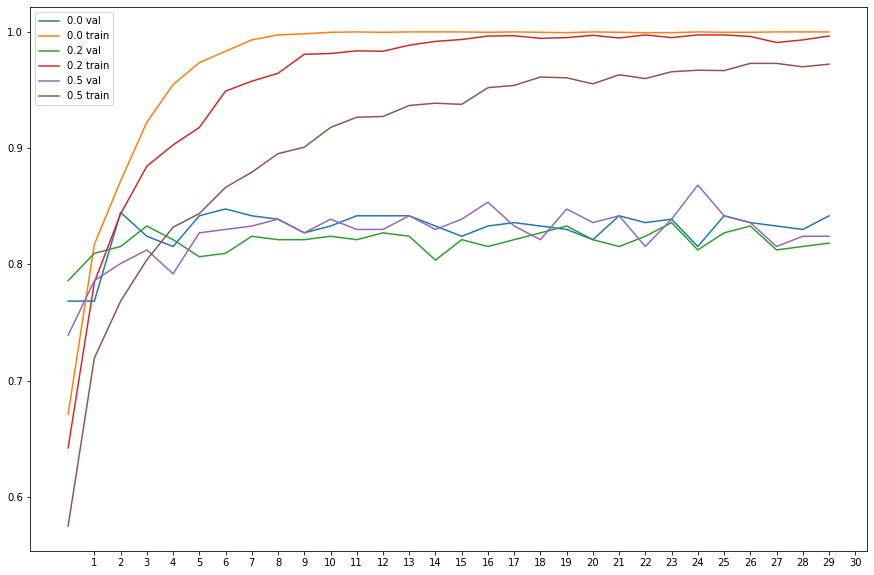

In [58]:
plt.figure(figsize=(15,10))
for drop_rate, hist in scores.items():
  if drop_rate == 0.8:
    continue
  plt.plot(hist['val_accuracy'], label=f'{drop_rate} val')
  plt.plot(hist['accuracy'], label=f'{drop_rate} train')
plt.xticks(np.arange(1, 31))
plt.legend()

In [41]:
DROP_RATE = 0.5

## Data augmentation

In [61]:
from PIL import Image

In [59]:
def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x

In [60]:
def augment(img, 
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    
    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [62]:
def show_augmentations(param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()    

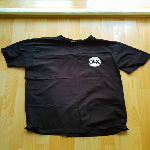

In [63]:
tshirt = Image.open('./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg')
tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt

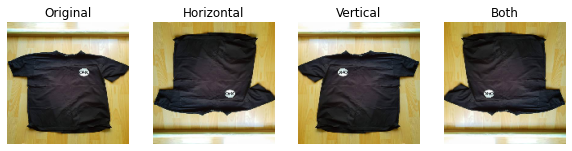

In [64]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show() 

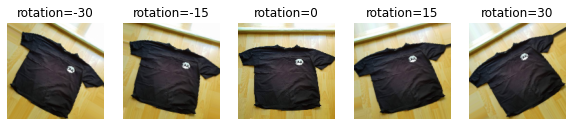

In [65]:
param = 'rotation'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

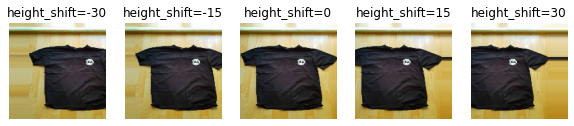

In [66]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

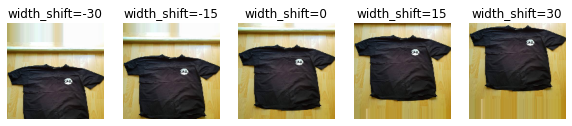

In [67]:
param = 'width_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

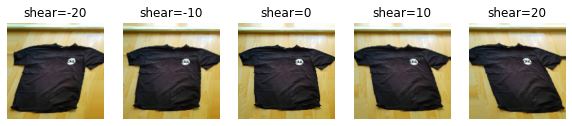

In [72]:
param = 'shear'
values = [-20, -10, 0, 10, 20]
show_augmentations(param, values, (10, 3))

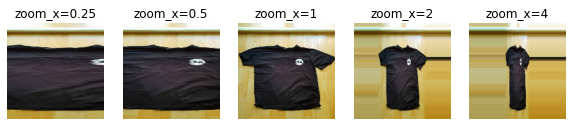

In [73]:
param = 'zoom_x'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

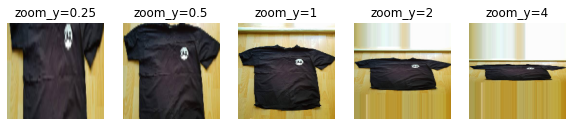

In [74]:
param = 'zoom_y'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

### keras ImageDataGenerator

In [68]:
vis_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    height_shift_range=5.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [69]:
x = np.array(tshirt)

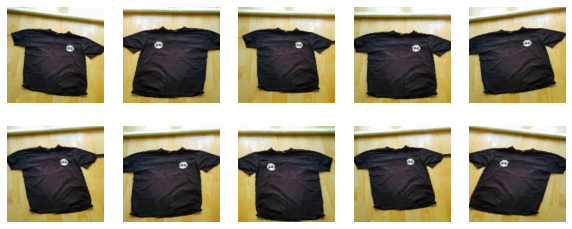

In [70]:
plt.figure(figsize=(10, 4))

for i in range(10):
    t = vis_gen.get_random_transform((150, 150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i + 1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis("off")

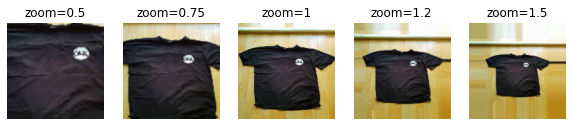

In [71]:
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(tshirt, zoom_y=v, zoom_x=v)
    imgs.append(im)

plt.figure(figsize=(10, 3))

n = len(values)

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' % ('zoom', values[i]))
    plt.axis("off")

plt.show()

### Training set augmentation

In [84]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

In [85]:
train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32,
)

Found 3068 images belonging to 10 classes.


In [86]:
model = make_model(learning_rate=0.001, drop_rate=0.5, size_inner=100)
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 30s 282ms/step - loss: 1.5043 - accuracy: 0.5007 - val_loss: 0.9691 - val_accuracy: 0.6862
Epoch 2/50
96/96 [==============================] - 29s 299ms/step - loss: 1.1123 - accuracy: 0.6252 - val_loss: 0.7771 - val_accuracy: 0.7449
Epoch 3/50
96/96 [==============================] - 26s 273ms/step - loss: 0.9794 - accuracy: 0.6672 - val_loss: 0.7240 - val_accuracy: 0.7507
Epoch 4/50
96/96 [==============================] - 27s 280ms/step - loss: 0.9300 - accuracy: 0.6786 - val_loss: 0.6821 - val_accuracy: 0.7801
Epoch 5/50
96/96 [==============================] - 27s 281ms/step - loss: 0.8577 - accuracy: 0.7070 - val_loss: 0.6498 - val_accuracy: 0.7683
Epoch 6/50
96/96 [==============================] - 27s 279ms/step - loss: 0.8240 - accuracy: 0.7213 - val_loss: 0.6443 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] - 26s 272ms/step - loss: 0.7735 - accuracy: 0.7370 - val_loss: 0.6154 - val_accuracy: 0.7889

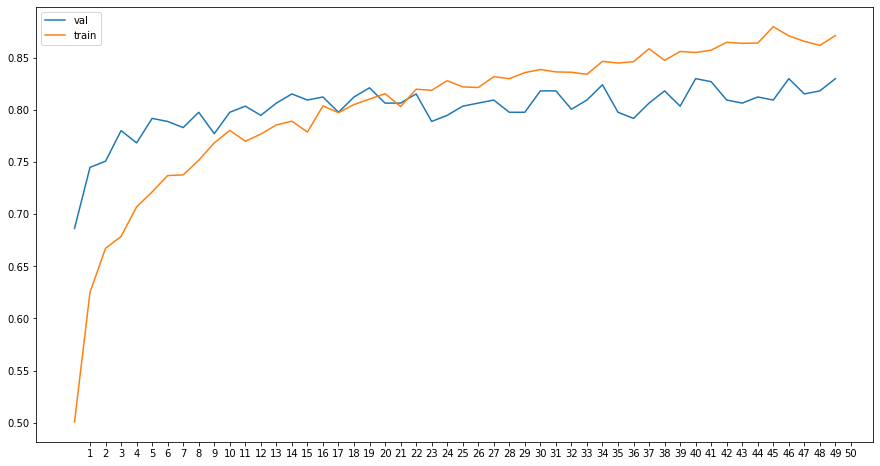

In [91]:
plt.figure(figsize=(15,8))
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')
plt.xticks(np.arange(1, 51))
plt.legend()

## Training a larger model

In [10]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.5, input_size=150):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size,3)
    )
  base_model.trainable = False

  ###################################################

  inputs = keras.Input(shape=(input_size, input_size, 3))
  base = base_model(inputs, training=False)
  pooling = keras.layers.GlobalAveragePooling2D()
  vectors = pooling(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(drop_rate)(inner)
  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  ###################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [8]:
LEARNING_RATE = 0.001
INPUT_SIZE = 299
DROP_RATE = 0.5
SIZE_INNER = 100

In [14]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
    )

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
     target_size=(INPUT_SIZE, INPUT_SIZE),
     batch_size=32,
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [15]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    )

In [5]:
model = make_model(
    input_size=INPUT_SIZE,
    learning_rate=LEARNING_RATE,
    drop_rate=DROP_RATE,
    size_inner=SIZE_INNER)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[checkpoint])

NameError: ignored

## Evaluating and using the model on test dataset

In [22]:
import tensorflow as tf
import keras
import numpy as np

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.xception import preprocess_input

In [13]:
model = keras.models.load_model('/content/drive/MyDrive/xception_v4_10_0.897.h5')

In [12]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=32
)

Found 372 images belonging to 10 classes.


In [14]:
model.evaluate(test_ds)

12/12 [==============================] - 14s 332ms/step - loss: 0.2825 - accuracy: 0.8952


[0.2825072109699249, 0.8951612710952759]

In [15]:
path = '/content/clothing-dataset-small/test/pants/0dfec862-c49f-430b-a6ef-c7ceb187225e.jpg'

In [21]:
img = load_img(path, target_size=(299, 299))

In [23]:
X = np.array([np.array(img)])
X.shape

(1, 299, 299, 3)

In [26]:
pred = model.predict(preprocess_input(X))

1/1 [==============================] - 0s 60ms/step


In [27]:
pred[0]

array([-1.8197227 , -4.05915   , -0.5064179 , -1.0924315 , 10.051954  ,
        0.11728901, -6.056479  ,  2.6703076 , -4.2526875 , -5.9615993 ],
      dtype=float32)

In [28]:
classes = ['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']

In [30]:
dict(zip(classes, pred[0]))

{'dress': -1.8197227,
 'hat': -4.05915,
 'longsleeve': -0.5064179,
 'outwear': -1.0924315,
 'pants': 10.051954,
 'shirt': 0.117289014,
 'shoes': -6.056479,
 'shorts': 2.6703076,
 'skirt': -4.2526875,
 't-shirt': -5.9615993}